
#Analyzing Historic Olympics data to Predict the 2024 Paris Olympics

In the following project, we have performed analysis on the Historic Olympics dataset to train a **Random Forest Regressor model** and make predictions for the 2024 Paris Olympics results.

In addition to this, we have analyzed the data to make observations on the different factors that are believed to affect Olympics results. Instead of going with the usual factors such as athlete demographics, we decided to go with exploring the effect of socio-economic factors such as GDP of a country. We have visualized our findings in the form of graphs. Lastly, we used our data analysis to answer some often asked questions (and questions that we had as a group)

Libraries used during this project:
1. Pandas and Numpy: Data Handling and Analysis
2. Scikit-learn: Machine Learning library used to train our model for making the prediction
3. Matplotlib: Data Visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns

# Data Cleaning and Processing

---

Datasets used:
1. Historic olympics data
https://www.kaggle.com/datasets/heesoo37/
2. Tokyo Olympics 2020
https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo
3. GDP
https://www.kaggle.com/datasets/tunguz/country-regional-and-world-gdp
4. Unemployment
https://data.worldbank.org/indicator/SL.UEM.TOTL.NE.ZS?skipRedirection=true  
5. Population
https://www.gapminder.org/data/documentation/gd003/

For all the datasets, we:
- Removed any unwanted columns. For eg, some of the datasets had additional columns that was of no use to us such as 'Country Indicator' in Unemployment rate dataset or Athlete information from the Historic Olympics dataset.
- Replaced NaN values with appropriate values. For eg, in the Historic Olympics dataset, if a team did not win any awards, the 'medals' data was entered as NaN which we replaced with a string 'No Medals'
- Because our main focus on analysis was on socio-economic factors' effect on olympics results, we joined the olympics data we had with the GDP, Unemployment and Population data we had. We performed the join on 'Team' i.e. the Country and the year.

Our final processed dataset is stored in a Dataframe named 'merged_data'. The same dataset is also uploaded in CSV format to our Github.

In [ ]:
# GDP by country for each year dataset
gdp_data = pd.read_csv('/kaggle/gdp_csv.csv')
gdp_data

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [ ]:
#loading the historic data
historic_atheletes = pd.read_csv('/kaggle/athlete_events_historic.csv')
data = historic_atheletes[historic_atheletes['Season'] == 'Summer']
# Removing any unwanted columns and replace NaN medal values with string
data = data.drop(columns=['Season', 'Event', 'Games'])
data['Medal'] = data['Medal'].fillna('No Medals')
data.head()
# data[(data['Team'] == 'United States') & (data['Medal'].isin(['Gold', 'Silver']))]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,No Medals
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,No Medals
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Antwerpen,Football,No Medals
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932,Los Angeles,Athletics,No Medals


In [ ]:
# create host country column

host_countries = {
    1896: 'Greece',
    1900: 'France',
    1904: 'USA',
    1906: 'Greece',
    1908: 'UK',
    1912: 'Sweden',
    1920: 'Belgium',
    1924: 'France',
    1928: 'Netherlands',
    1932: 'USA',
    1936: 'Germany',
    1940: 'Japan/Finland',  # Note: Combined host cities
    1944: 'UK',             # Not held
    1948: 'UK',
    1952: 'Finland',
    1956: 'Australia',      # Note: Also held in Sweden
    1960: 'Italy',
    1964: 'Japan',
    1968: 'Mexico',
    1972: 'Germany',
    1976: 'Canada',
    1980: 'USSR',
    1984: 'USA',
    1988: 'South Korea',
    1992: 'Spain',
    1996: 'USA',
    2000: 'Australia',
    2004: 'Greece',
    2008: 'China',
    2012: 'UK',
    2016: 'Brazil',
    2021: 'Japan'
}


years = list(range(1896, 2022))
#Dropping any unwanted columns
data = data.drop(columns=['City', 'ID', 'Name', 'Sex', 'Height', 'Weight'])
# Map the host countries based on the 'Year' column
data['Host_Country'] = data['Year'].map(host_countries)
data

,Age,Team,NOC,Year,Sport,Medal,Host_Country
0,24.0,China,CHN,1992,Basketball,No Medals,Spain
1,23.0,China,CHN,2012,Judo,No Medals,UK
2,24.0,Denmark,DEN,1920,Football,No Medals,Belgium
3,34.0,Denmark/Sweden,DEN,1900,Tug-Of-War,Gold,France
26,18.0,Netherlands,NED,1932,Athletics,No Medals,USA
...,...,...,...,...,...,...,...
271106,27.0,Argentina,ARG,2004,Hockey,No Medals,Greece
271107,21.0,United States,USA,1972,Football,No Medals,Germany
271108,24.0,Russia,RUS,2000,Rowing,No Medals,Australia
271109,28.0,Russia,RUS,2004,Rowing,No Medals,Greece


In [ ]:
# get rid of age column and use average age by country and year
data['Average_Age'] = data.groupby(['Year', 'Team'])['Age'].transform('mean')

# Drop the original Age column
data.drop(columns=['Age'], inplace=True)
data['Average_Age'] = data['Average_Age'].round(2)
data['Year'].min()

1896

In [ ]:
# Load national populations by year
country_population = pd.read_excel('/kaggle/country_population_data.xlsx', "Data")
country_population


,Area,Year,Population,Population with interpolations,Source,source - details (col 1),source details (col 2),Available on-line,Type of primary data,Data footnote,...,Gapminder modifications - explanations col. 2,Other notes by gapminder (col 1).,Other notes by gapminder (col 2).,Geographical coverage (col 1),Geographical coverage (col 2),Secondary layer of sources (col 1),Secondary layer of sources (col 2),Tertiary layer of sources (col 1),Tertiary layer of sources (col 2),Tertiary layer of sources (col 3)
0,Abkhazia,1491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abkhazia,1555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abkhazia,1575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abkhazia,1600,NaN,NaN,No data,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abkhazia,1601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131624,Åland,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131625,Åland,2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131626,Åland,2098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131627,Åland,2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Removing columns from years previous to 1990 and columns which makes predictions for population count post 2024
population_data = country_population[(country_population['Year'] > 1900) & (country_population['Year'] < 2024)]
population_data

,Area,Year,Population,Population with interpolations,Source,source - details (col 1),source details (col 2),Available on-line,Type of primary data,Data footnote,...,Gapminder modifications - explanations col. 2,Other notes by gapminder (col 1).,Other notes by gapminder (col 2).,Geographical coverage (col 1),Geographical coverage (col 2),Secondary layer of sources (col 1),Secondary layer of sources (col 2),Tertiary layer of sources (col 1),Tertiary layer of sources (col 2),Tertiary layer of sources (col 3)
304,Abkhazia,1901,NaN,NaN,No data,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,Abkhazia,1902,NaN,NaN,No data,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,Abkhazia,1903,NaN,NaN,No data,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,Abkhazia,1904,NaN,NaN,No data,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,Abkhazia,1905,NaN,NaN,No data,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131547,Åland,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131548,Åland,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131549,Åland,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131550,Åland,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
population_data = country_population[(country_population['Year'] > 1890) & (country_population['Year'] < 2024)][['Year', 'Area', 'Population with interpolations']]

# Display population Dataset
population_data


,Year,Area,Population with interpolations
294,1891,Abkhazia,NaN
295,1892,Abkhazia,NaN
296,1893,Abkhazia,NaN
297,1894,Abkhazia,NaN
298,1895,Abkhazia,NaN
...,...,...,...
131547,2019,Åland,NaN
131548,2020,Åland,NaN
131549,2021,Åland,NaN
131550,2022,Åland,NaN


In [ ]:
population_data.rename(columns={'Area': 'Team'}, inplace=True)
population_data

,Year,Team,Population with interpolations
294,1891,Abkhazia,NaN
295,1892,Abkhazia,NaN
296,1893,Abkhazia,NaN
297,1894,Abkhazia,NaN
298,1895,Abkhazia,NaN
...,...,...,...
131547,2019,Åland,NaN
131548,2020,Åland,NaN
131549,2021,Åland,NaN
131550,2022,Åland,NaN


In [ ]:
# Merges population data with historic Oylmpic data
merged_data = pd.merge(data, population_data, on=['Year', 'Team'], how='left')
merged_data.rename(columns={'Population with interpolations': 'Population'}, inplace=True)
merged_data

,Team,NOC,Year,Sport,Medal,Host_Country,Average_Age,Population
0,China,CHN,1992,Basketball,No Medals,Spain,21.96,1.175230e+09
1,China,CHN,2012,Judo,No Medals,UK,23.89,1.353601e+09
2,Denmark,DEN,1920,Football,No Medals,Belgium,28.83,3.242000e+06
3,Denmark/Sweden,DEN,1900,Tug-Of-War,Gold,France,30.83,NaN
4,Netherlands,NED,1932,Athletics,No Medals,USA,37.56,8.123000e+06
...,...,...,...,...,...,...,...,...
222547,Argentina,ARG,2004,Hockey,No Medals,Greece,27.01,3.834078e+07
222548,United States,USA,1972,Football,No Medals,Germany,23.62,2.132504e+08
222549,Russia,RUS,2000,Rowing,No Medals,Australia,25.23,1.467575e+08
222550,Russia,RUS,2004,Rowing,No Medals,Greece,26.05,1.443070e+08


In [ ]:
# Loads regional data
historic_noc = pd.read_csv('/kaggle/noc_regions_historic.csv')
data = pd.DataFrame(historic_noc)
data

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [ ]:
# Merges gdp data with historic data and population data and remove unwanted columns
gdp_data.rename(columns={'Country Name': 'Team'}, inplace=True)
merged_data = pd.merge(merged_data, gdp_data, on=['Year', 'Team'], how='left')
merged_data.rename(columns={'Value': 'GDP'}, inplace=True)
merged_data = merged_data.drop(columns=['Country Code'])

In [ ]:
merged_data

,Team,NOC,Year,Sport,Medal,Host_Country,Average_Age,Population,GDP
0,China,CHN,1992,Basketball,No Medals,Spain,21.96,1.175230e+09,4.269157e+11
1,China,CHN,2012,Judo,No Medals,UK,23.89,1.353601e+09,8.560547e+12
2,Denmark,DEN,1920,Football,No Medals,Belgium,28.83,3.242000e+06,NaN
3,Denmark/Sweden,DEN,1900,Tug-Of-War,Gold,France,30.83,NaN,NaN
4,Netherlands,NED,1932,Athletics,No Medals,USA,37.56,8.123000e+06,NaN
...,...,...,...,...,...,...,...,...,...
222547,Argentina,ARG,2004,Hockey,No Medals,Greece,27.01,3.834078e+07,1.646579e+11
222548,United States,USA,1972,Football,No Medals,Germany,23.62,2.132504e+08,1.282449e+12
222549,Russia,RUS,2000,Rowing,No Medals,Australia,25.23,1.467575e+08,NaN
222550,Russia,RUS,2004,Rowing,No Medals,Greece,26.05,1.443070e+08,NaN


In [ ]:
# Loads unployments rates by country for each year between 1970-2023
unemployment = pd.read_excel('/kaggle/unemployment.xlsx')
data = pd.DataFrame(unemployment)
#Drop unwanted columns
data.drop(columns=data.loc[:, 'Country Code':'1969'], inplace=True)
data

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.915000,NaN,NaN,11.184000,NaN,NaN,11.710,5.580,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.356261,NaN,NaN,6.991943,NaN,7.793947,NaN,NaN,3.289223,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.579000,NaN,NaN,NaN,NaN,16.497000,NaN,15.799,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.264000,32.840,27.491,30.344000,27.761,25.069000,25.459,20.392,12.093000,NaN
262,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.467000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.606000,22.869,24.023,23.992000,24.218,25.538000,24.339,28.770,28.838000,27.989
264,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11.888,NaN,8.518000,5.031,5.539000,6.032,5.195,5.993000,NaN


In [ ]:
#In order to be able to join the unemployment data with the main dataset, we need to have countries and years in row format in order to be able to JOIN usig country and year.
unemployment_data = data.melt(id_vars=['Country Name'], var_name='Year', value_name='Unemployment')
unemployment_data

,Country Name,Year,Unemployment
0,Aruba,1970,NaN
1,Africa Eastern and Southern,1970,NaN
2,Afghanistan,1970,NaN
3,Africa Western and Central,1970,NaN
4,Angola,1970,NaN
...,...,...,...
14359,Kosovo,2023,NaN
14360,"Yemen, Rep.",2023,NaN
14361,South Africa,2023,27.989
14362,Zambia,2023,NaN


In [ ]:
# Merges unemployment data with the main arrgegate data
unemployment_data.rename(columns={'Country Name': 'Team'}, inplace=True)
merged_data['Year'] = merged_data['Year'].astype(int)
merged_data['Team'] = merged_data['Team'].astype(str)
unemployment_data['Year'] = unemployment_data['Year'].astype(int)
unemployment_data['Team'] = unemployment_data['Team'].astype(str)
merged_data = pd.merge(merged_data, unemployment_data, on=['Year', 'Team'], how='left')
merged_data = merged_data[(merged_data['Year'] > 1959)]
merged_data


,Team,NOC,Year,Sport,Medal,Host_Country,Average_Age,Population,GDP,Unemployment
0,China,CHN,1992,Basketball,No Medals,Spain,21.96,1.175230e+09,4.269157e+11,2.300
1,China,CHN,2012,Judo,No Medals,UK,23.89,1.353601e+09,8.560547e+12,4.100
7,Finland,FIN,2000,Badminton,No Medals,Australia,26.22,5.173370e+06,1.255399e+11,11.135
8,Finland,FIN,1996,Sailing,No Medals,USA,26.03,5.125177e+06,1.320994e+11,15.572
9,Finland,FIN,2000,Sailing,No Medals,Australia,26.22,5.173370e+06,1.255399e+11,11.135
...,...,...,...,...,...,...,...,...,...,...
222547,Argentina,ARG,2004,Hockey,No Medals,Greece,27.01,3.834078e+07,1.646579e+11,13.522
222548,United States,USA,1972,Football,No Medals,Germany,23.62,2.132504e+08,1.282449e+12,5.600
222549,Russia,RUS,2000,Rowing,No Medals,Australia,25.23,1.467575e+08,NaN,NaN
222550,Russia,RUS,2004,Rowing,No Medals,Greece,26.05,1.443070e+08,NaN,NaN


In [ ]:
# merged_data.rename(columns={'Unemployment_x': 'Unemployment'}, inplace=True)
merged_data

,Team,NOC,Year,Sport,Medal,Host_Country,Average_Age,Population,GDP,Unemployment
0,China,CHN,1992,Basketball,No Medals,Spain,21.96,1.175230e+09,4.269157e+11,2.300
1,China,CHN,2012,Judo,No Medals,UK,23.89,1.353601e+09,8.560547e+12,4.100
7,Finland,FIN,2000,Badminton,No Medals,Australia,26.22,5.173370e+06,1.255399e+11,11.135
8,Finland,FIN,1996,Sailing,No Medals,USA,26.03,5.125177e+06,1.320994e+11,15.572
9,Finland,FIN,2000,Sailing,No Medals,Australia,26.22,5.173370e+06,1.255399e+11,11.135
...,...,...,...,...,...,...,...,...,...,...
222547,Argentina,ARG,2004,Hockey,No Medals,Greece,27.01,3.834078e+07,1.646579e+11,13.522
222548,United States,USA,1972,Football,No Medals,Germany,23.62,2.132504e+08,1.282449e+12,5.600
222549,Russia,RUS,2000,Rowing,No Medals,Australia,25.23,1.467575e+08,NaN,NaN
222550,Russia,RUS,2004,Rowing,No Medals,Greece,26.05,1.443070e+08,NaN,NaN


In [ ]:
merged_data.drop(columns=['NOC'], inplace=True)

In [ ]:
total = merged_data.isna().any(axis=1).sum()
total

77887

In [ ]:
average_population = merged_data['Population'].mean()
average_GDP = merged_data['GDP'].mean()
average_Unemployment = merged_data['Unemployment'].mean()
average_Age = merged_data['Average_Age'].mean()
# Replace NaN values with the calculated average population
merged_data['Population'] = merged_data['Population'].fillna(average_population)
merged_data['GDP'] = merged_data['GDP'].fillna(average_GDP)
merged_data['Unemployment'] = merged_data['Unemployment'].fillna(average_Unemployment)
merged_data['Average_Age'] = merged_data['Average_Age'].fillna(average_Age)
merged_data

,Team,Year,Sport,Medal,Host_Country,Average_Age,Population,GDP,Unemployment
0,China,1992,Basketball,No Medals,Spain,21.96,1.175230e+09,4.269157e+11,2.30000
1,China,2012,Judo,No Medals,UK,23.89,1.353601e+09,8.560547e+12,4.10000
7,Finland,2000,Badminton,No Medals,Australia,26.22,5.173370e+06,1.255399e+11,11.13500
8,Finland,1996,Sailing,No Medals,USA,26.03,5.125177e+06,1.320994e+11,15.57200
9,Finland,2000,Sailing,No Medals,Australia,26.22,5.173370e+06,1.255399e+11,11.13500
...,...,...,...,...,...,...,...,...,...
222547,Argentina,2004,Hockey,No Medals,Greece,27.01,3.834078e+07,1.646579e+11,13.52200
222548,United States,1972,Football,No Medals,Germany,23.62,2.132504e+08,1.282449e+12,5.60000
222549,Russia,2000,Rowing,No Medals,Australia,25.23,1.467575e+08,1.243896e+12,7.76877
222550,Russia,2004,Rowing,No Medals,Greece,26.05,1.443070e+08,1.243896e+12,7.76877


In [ ]:
total = merged_data.isna().any(axis=1)
print(merged_data[total])

Empty DataFrame
Columns: [Team, Year, Sport, Medal, Host_Country, Average_Age, Population, GDP, Unemployment]
Index: []


# Random Forest Regression for model Training and Prediction

---

We use the processed data and firstly split it into training and testing data. Using the training data we train a Random Forest Regression Model and use the model to make predictions on the training data. Using the predicted and the actual values, we can then calculate our mean squared error.

Because we do not have a complete dataset for the 2024 Paris Olympics, we were unable to test and make predictions for the Paris Olympics. The Paris Olympics dataset provided by Codedex only had information such as events. It did not have crucial events such as athletes participating for the events. However, considering the low mean sqaured error we were able to achieve, if the model is used on a complete Paris 2024 Olympics dataset, it should make the predicitions with a good accuracy value.

In [ ]:
# One hot encoding for categorical variables
encoded_data = pd.get_dummies(merged_data, columns=['Host_Country', 'Team', 'Medal', 'Sport'])
encoded_data

,Year,Average_Age,Population,GDP,Unemployment,Host_Country_Australia,Host_Country_Brazil,Host_Country_Canada,Host_Country_China,Host_Country_Germany,...,Sport_Synchronized Swimming,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling
0,1992,21.96,1.175230e+09,4.269157e+11,2.30000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2012,23.89,1.353601e+09,8.560547e+12,4.10000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2000,26.22,5.173370e+06,1.255399e+11,11.13500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1996,26.03,5.125177e+06,1.320994e+11,15.57200,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2000,26.22,5.173370e+06,1.255399e+11,11.13500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,2004,27.01,3.834078e+07,1.646579e+11,13.52200,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
222548,1972,23.62,2.132504e+08,1.282449e+12,5.60000,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
222549,2000,25.23,1.467575e+08,1.243896e+12,7.76877,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
222550,2004,26.05,1.443070e+08,1.243896e+12,7.76877,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
features = encoded_data.drop(columns=['Medal_No Medals', 'Medal_Gold', 'Medal_Silver', 'Medal_Bronze'])
target = encoded_data[['Medal_Gold', 'Medal_Silver', 'Medal_Bronze', 'Medal_No Medals']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# DONT RUN THIS

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# DONT RUN THIS

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print(f"Mean Squared Error: {mse}")

Mean Squared Error: [0.03059294 0.03342864 0.03519491 0.07745526]


In [ ]:
encoded_data.to_csv('encoded_data.csv', index=False)

In [ ]:
from google.colab import files

files.download('encoded_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged_data.to_csv('encoded_data.csv', index=False)

In [ ]:
from joblib import dump

# Assuming 'model' is your trained scikit-learn model (e.g., pipeline or estimator)
dump(model, 'olympics_data_model.joblib')

['olympics_data_model.joblib']

In [ ]:
from google.colab import files

files.download('olympics_data_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Additional Data Analysis

**Do Host Countries have an advantage when it comes to the Olympics?**

In [ ]:
# Integrated the host country for each event and the number of medals won by each country for each event

host_country_data = merged_data.copy()
host_country_data_filtered = host_country_data[host_country_data['Medal'] != 'No Medals'].copy()
host_country_data_filtered['Medal_Count'] = host_country_data_filtered.groupby(['Host_Country', 'Year'])['Medal'].transform('count')
merged_data_w_medal_count = host_country_data_filtered.copy()
host_countries_list = list(host_countries.values())
host_country_data_filtered = host_country_data_filtered[host_country_data_filtered['Team'].isin(host_countries_list)]
host_country_data_final = host_country_data_filtered.drop_duplicates(subset=['Team', 'Year'])
host_country_data_final

,Team,Year,Sport,Medal,Host_Country,Average_Age,Population,GDP,Unemployment,Medal_Count
41,Netherlands,1988,Hockey,Bronze,South Korea,25.04,14701901.0,2.585678e+11,9.36900,1582
42,Netherlands,1996,Rowing,Silver,USA,26.27,15517122.0,4.457046e+11,6.42100,1842
96,Italy,2016,Rowing,Bronze,Brazil,26.84,61286323.0,1.858913e+12,11.72500,2023
97,Spain,2008,Fencing,Bronze,China,26.68,45146258.0,1.635015e+12,11.25500,2048
111,France,2008,Handball,Gold,China,26.29,62098413.0,2.923466e+12,7.38600,2048
...,...,...,...,...,...,...,...,...,...,...
158190,Finland,2016,Boxing,Bronze,Brazil,26.43,5465617.0,2.385029e+11,8.81800,2023
166702,Spain,1972,Boxing,Bronze,Germany,24.63,34553119.0,5.897181e+10,1.50000,1215
177237,Mexico,1996,Athletics,Bronze,USA,24.77,93858373.0,3.974041e+11,5.46500,1842
203824,Belgium,1980,Judo,Gold,USSR,23.05,9847297.0,1.275082e+11,9.10000,1384


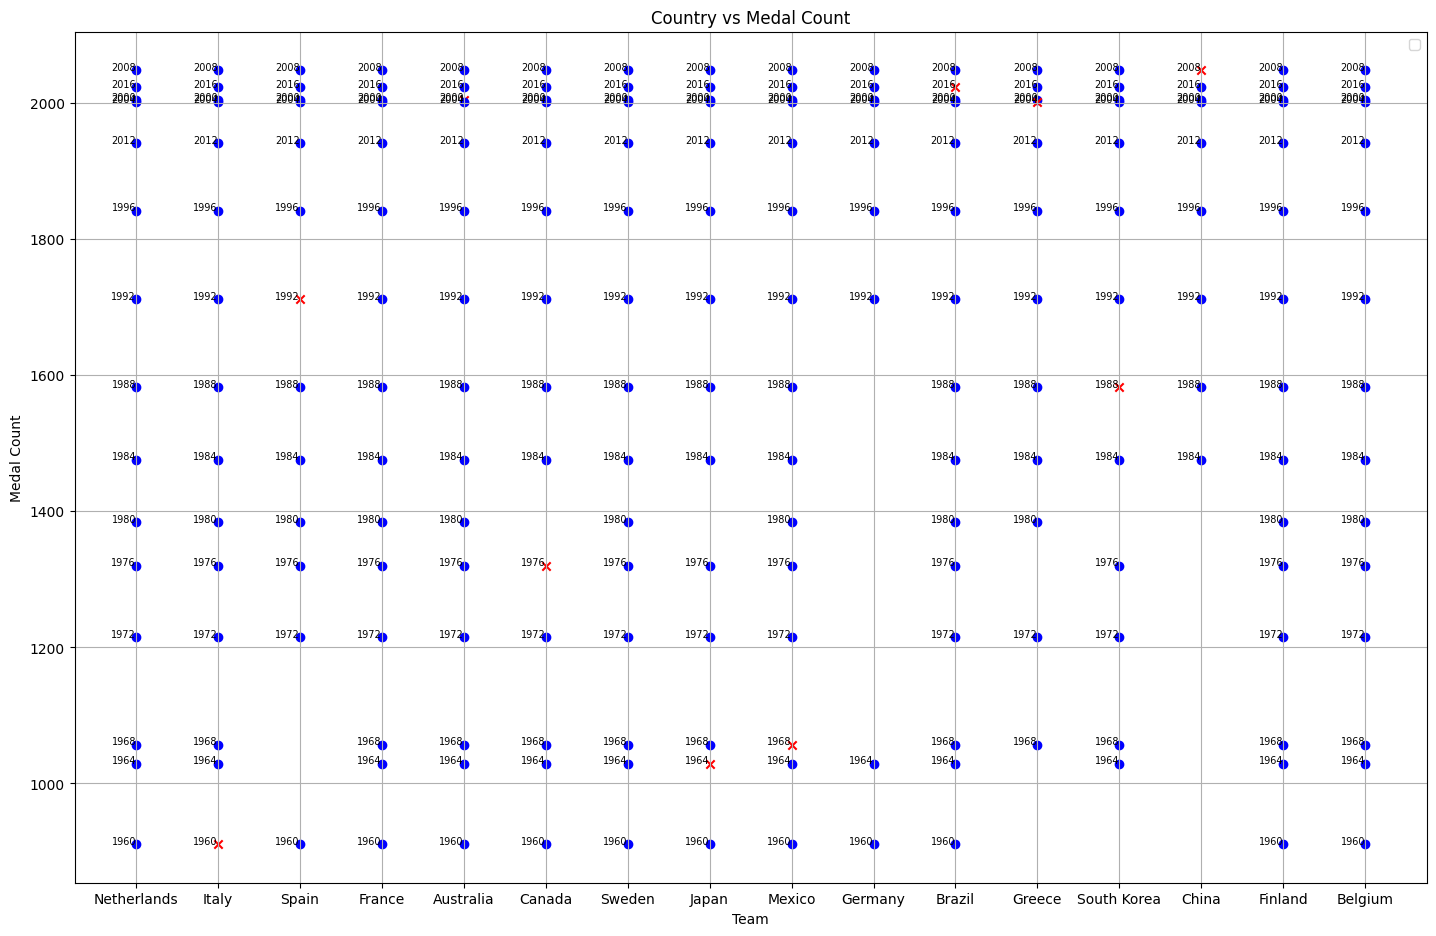

In [ ]:
# Plots the country vs the number of medals that country won since 1960
fig, ax = plt.subplots(figsize=(15, 10))

for index, row in host_country_data_final.iterrows():
    if row['Team'] == row['Host_Country']:
        ax.scatter(row['Team'], row['Medal_Count'], color='red', marker='x', label='Host Year' if index == 0 else "")
    else:
        ax.scatter(row['Team'], row['Medal_Count'], color='blue', marker='o', label='Other Years' if index == 0 else "")

    ax.text(row['Team'], row['Medal_Count'], f"{row['Year']}", fontsize=7, ha='right')


ax.set_xlabel('Team')
ax.set_ylabel('Medal Count')
ax.set_title('Country vs Medal Count')

plt.tight_layout(pad=3.0)
plt.grid(True)
plt.show()

The graph above shows the number of medals won by various teams every Olympics year. The red crosses depicts the year where the Team was also the Host Country. The blue dots depicts all other years. An interesting observation we can make from this data is that for a majority of the teams, the year they were the host country, they won more medals than the previous years and for all years thereafter, their performance went up. However, like most other data, there are always some outliers. In this situation, we can see that the outlier is China. China hosted the Olympics in 2008. The observation of a team doing better than previous years when they are the host country holds true as China won more awards in 2008 than previous years. But the descrepancy occurs in the observation of the teams doing better in the years after as well. In China's situation, we can see that in 2012 and 2016, the won less medals than in 2008.

However, in majority of the cases, the following statement holds true:

**A team perfoms better than previous years when they are the host country and their performance improves for the years thereafter**

**How do Socio-Economics facotrs Affect Olympics results, if they do at all?**

https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2016.00915.x

In this research paper, the author theorizes that a country will perform better in the Olympics if they have better socio-economic factors because the country will be able to worry less about the economy and focus on activities such as sports. We want to explore this hypothesis.

*How does GDP of a country Affect Olympics results*

In [ ]:
merged_data_w_medal_count

,Team,Year,Sport,Medal,Host_Country,Average_Age,Population,GDP,Unemployment,Medal_Count
33,Norway,2008,Handball,Gold,China,28.14,4.778959e+06,4.625544e+11,2.52100,2048
41,Netherlands,1988,Hockey,Bronze,South Korea,25.04,1.470190e+07,2.585678e+11,9.36900,1582
42,Netherlands,1996,Rowing,Silver,USA,26.27,1.551712e+07,4.457046e+11,6.42100,1842
54,Norway,1996,Football,Bronze,USA,25.48,4.385139e+06,1.635178e+11,5.03600,1842
96,Italy,2016,Rowing,Bronze,Brazil,26.84,6.128632e+07,1.858913e+12,11.72500,2023
...,...,...,...,...,...,...,...,...,...,...
222519,Netherlands,1996,Rowing,Gold,USA,26.27,1.551712e+07,4.457046e+11,6.42100,1842
222530,Soviet Union,1964,Athletics,Bronze,Japan,25.79,9.168615e+07,1.243896e+12,7.76877,1029
222532,Poland,1980,Fencing,Bronze,USSR,24.19,3.557721e+07,1.243896e+12,7.76877,1384
222544,Russia,2000,Athletics,Bronze,Australia,25.23,1.467575e+08,1.243896e+12,7.76877,2004


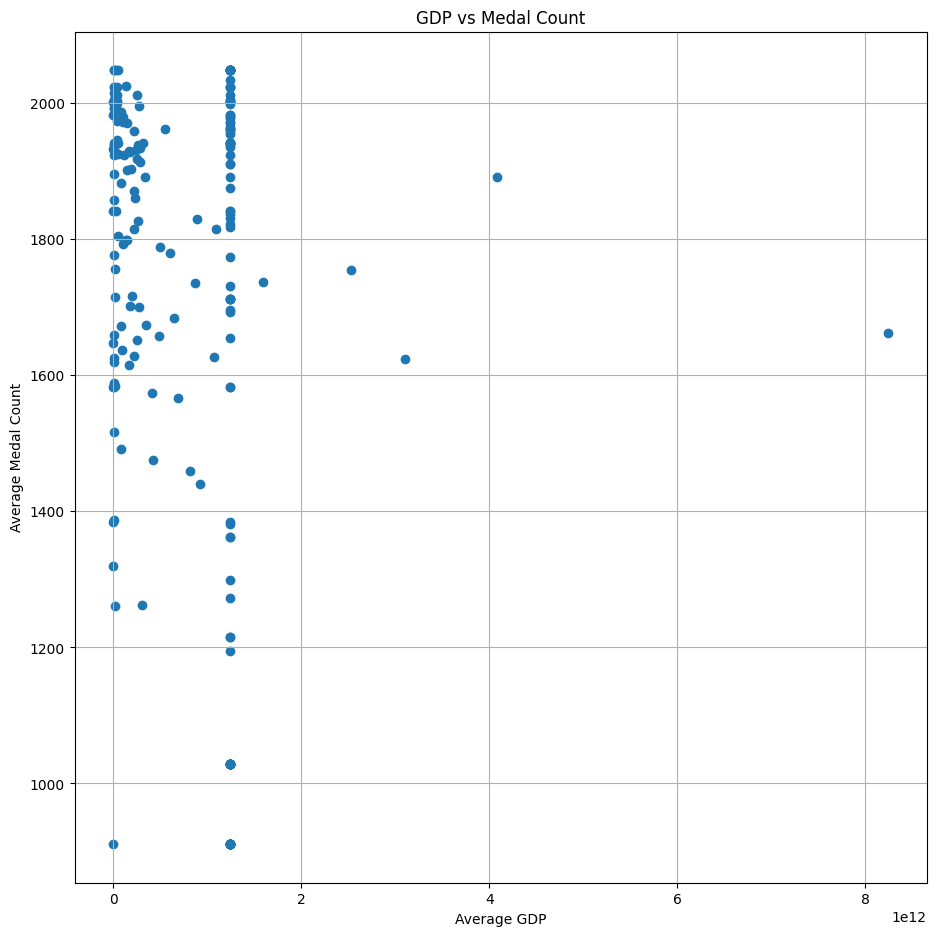

In [ ]:
#Find averages of GDP and medals won for a country over the years and the datapoint can have the label for the country
#Group by country and find the average GDP and average Medals won (avg Medal Count) for each country
grouped_data_w_avg = merged_data_w_medal_count.groupby('Team').agg({'GDP': 'mean', 'Medal_Count': 'mean'}).reset_index()

#Create the scatter plot with GDP as the X axis and Medals won as the Y axis
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(grouped_data_w_avg['GDP'], grouped_data_w_avg['Medal_Count'])

ax.set_xlabel('Average GDP')
ax.set_ylabel('Average Medal Count')
ax.set_title('GDP vs Medal Count')

plt.tight_layout(pad=3.0)
plt.grid(True)
plt.show()


The graph above we can see, for each country, the average GDP over the years plotted against the average number of medals won by them over the years.

Observations:
In some cases, yes, the country with the higher GDP did much better than the countries with a lower GDP. However, in an equally similar number of cases, the opposite was also true.

Therefore, based on the data we see, GDP does not seem to play a role on Olympics performance.

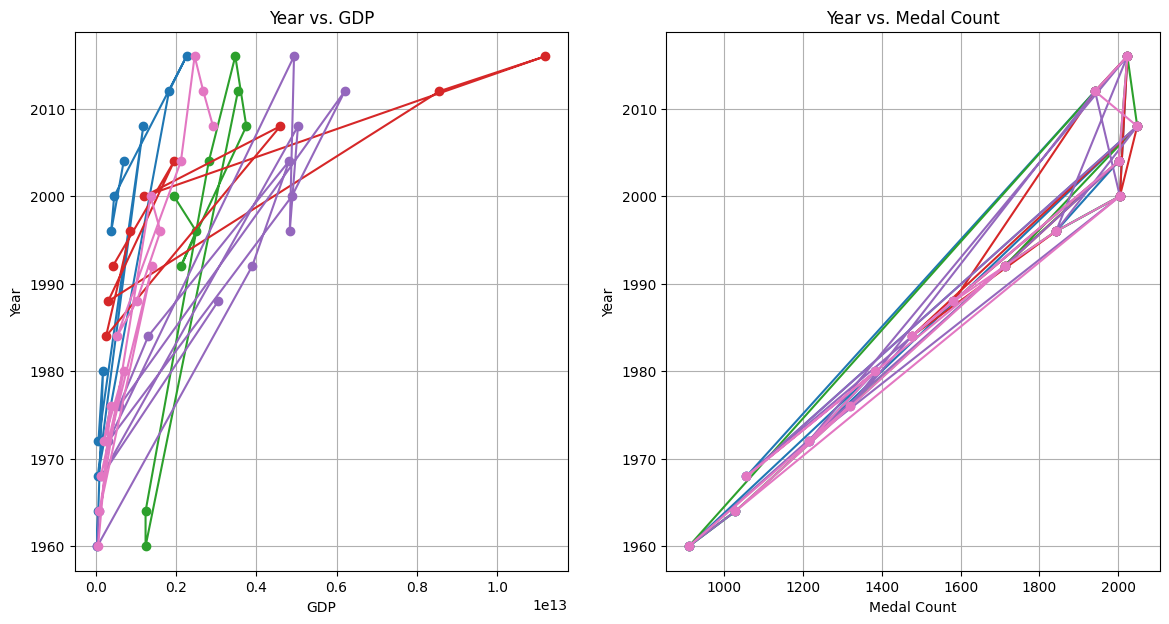

In [ ]:
#plot Years vs GDP and Years vs Medals one  - do this for certain countries
country_list = ['India', 'USA', 'Germany', 'China', 'Japan', 'UK', 'France']

#filter the merged data to only include the countries we want to plot
filtered_data = merged_data_w_medal_count[merged_data_w_medal_count['Team'].isin(country_list)]
filtered_data = filtered_data.drop_duplicates(subset=['Team', 'Year'])

#creating two graphs next to each other for ease of comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

#GDP vs Year for each country
for team in country_list:
    team_data = filtered_data[filtered_data['Team'] == team]
    ax1.plot(team_data['GDP'], team_data['Year'], label=team, marker='o')


ax1.set_xlabel('GDP')
ax1.set_ylabel('Year')
ax1.set_title('Year vs. GDP')
ax1.grid(True)

#Medal Count vs Year for each country
for team in country_list:
    team_data = filtered_data[filtered_data['Team'] == team]
    ax2.plot(team_data['Medal_Count'], team_data['Year'], label=team, marker='o')

ax.legend()

ax2.set_xlabel('Medal Count')
ax2.set_ylabel('Year')
ax2.set_title('Year vs. Medal Count')
ax2.grid(True)


plt.show()


The graphs above shows two plots for a selected number of countries, each country being depicted by a different color

1. GDP vs Years
2. Medal Count vs Years

In the previous graph, we concluded that when it comes to comparison of GDP of all countries and its effect on Olympics performance, GDP doesnt play that big of a role. However, an interesting observation we can make here is that for a particular country, an increase in GDP over the years does directly lead to an increase in Olympics performance as seen by an increase in medals earned by the team.

Therfore our final conclusion statement: Although GDP doesnt play that big of a role in Olympics performance in a GLOBAL scale, for a particular country, increase in GDP correlates to an increase in Olympics performance.

*How does Unemployment Rate of a country Affect Olympics results*

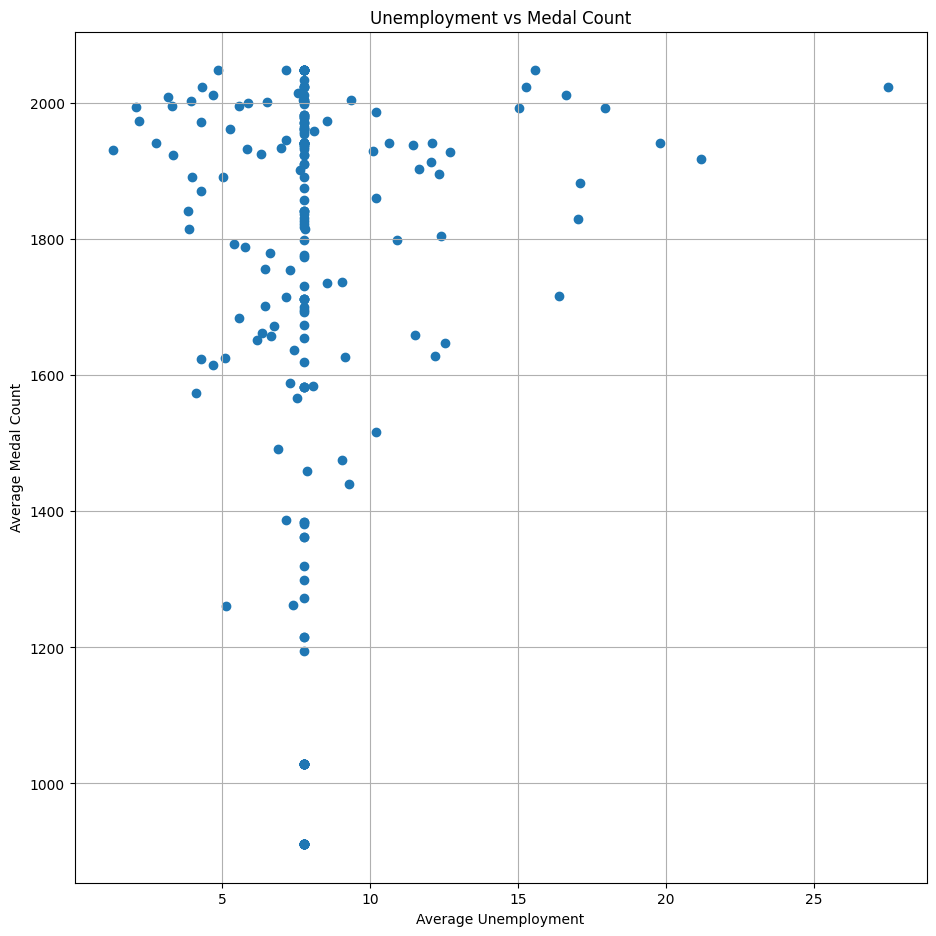

In [ ]:
#Find averages of unemployment and medals won for a country over the years and the datapoint can have the label for the country
#Group by country and find the average GDP and average Medals won (avg Medal Count) for each country
grouped_data_w_avg = merged_data_w_medal_count.groupby('Team').agg({'Unemployment': 'mean', 'Medal_Count': 'mean'}).reset_index()

#Create the scatter plot with GDP as the X axis and Medals won as the Y axis
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(grouped_data_w_avg['Unemployment'], grouped_data_w_avg['Medal_Count'])

ax.set_xlabel('Average Unemployment')
ax.set_ylabel('Average Medal Count')
ax.set_title('Unemployment vs Medal Count')

plt.tight_layout(pad=3.0)
plt.grid(True)
plt.show()

Similar to GDP, the data for unemployment plotted against average medals won is inconclusive. In some cases, countries with high unemployment seems to do better than the ones with a low rate but the vice versa also holds true.

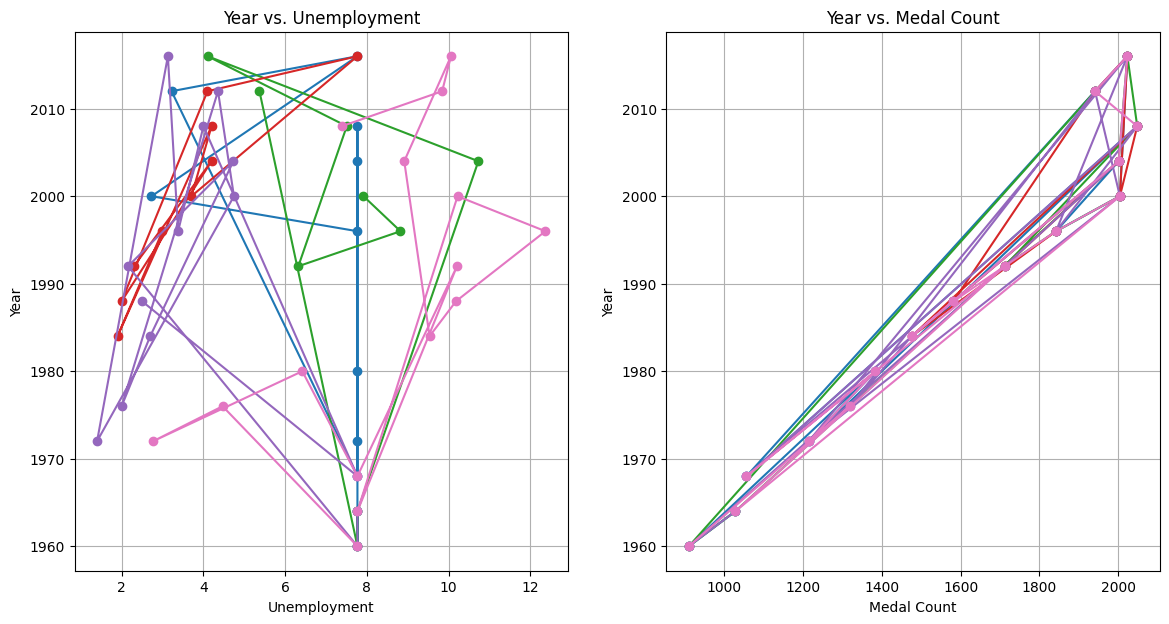

In [ ]:
#plot Years vs GDP and Years vs Medals one  - do this for certain countries
country_list = ['India', 'USA', 'Germany', 'China', 'Japan', 'UK', 'France']

#filter the merged data to only include the countries we want to plot
filtered_data = merged_data_w_medal_count[merged_data_w_medal_count['Team'].isin(country_list)]
filtered_data = filtered_data.drop_duplicates(subset=['Team', 'Year'])

#creating two graphs next to each other for ease of comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

#GDP vs Year for each country
for team in country_list:
    team_data = filtered_data[filtered_data['Team'] == team]
    ax1.plot(team_data['Unemployment'], team_data['Year'], label=team, marker='o')


ax1.set_xlabel('Unemployment')
ax1.set_ylabel('Year')
ax1.set_title('Year vs. Unemployment')
ax1.grid(True)

#Medal Count vs Year for each country
for team in country_list:
    team_data = filtered_data[filtered_data['Team'] == team]
    ax2.plot(team_data['Medal_Count'], team_data['Year'], label=team, marker='o')



ax2.set_xlabel('Medal Count')
ax2.set_ylabel('Year')
ax2.set_title('Year vs. Medal Count')
ax2.grid(True)


plt.show()

The data from both the graphs above is inconclusive as well. For instance, if we look at the pink line graph. In 1960, unemployment was high and medals won were low. In 1970, unemployment increased an medals won did so as well. However, in the years between 2010-2020, unemployment increased even more than 1960 but the Olympics performance seemed to improve as the number of medals won increased drastically.

Therefore our final statement - Unemployment of the country does not have an effect on the performance of the team in the Olympics

*How does Population of a country Affect Olympics results*

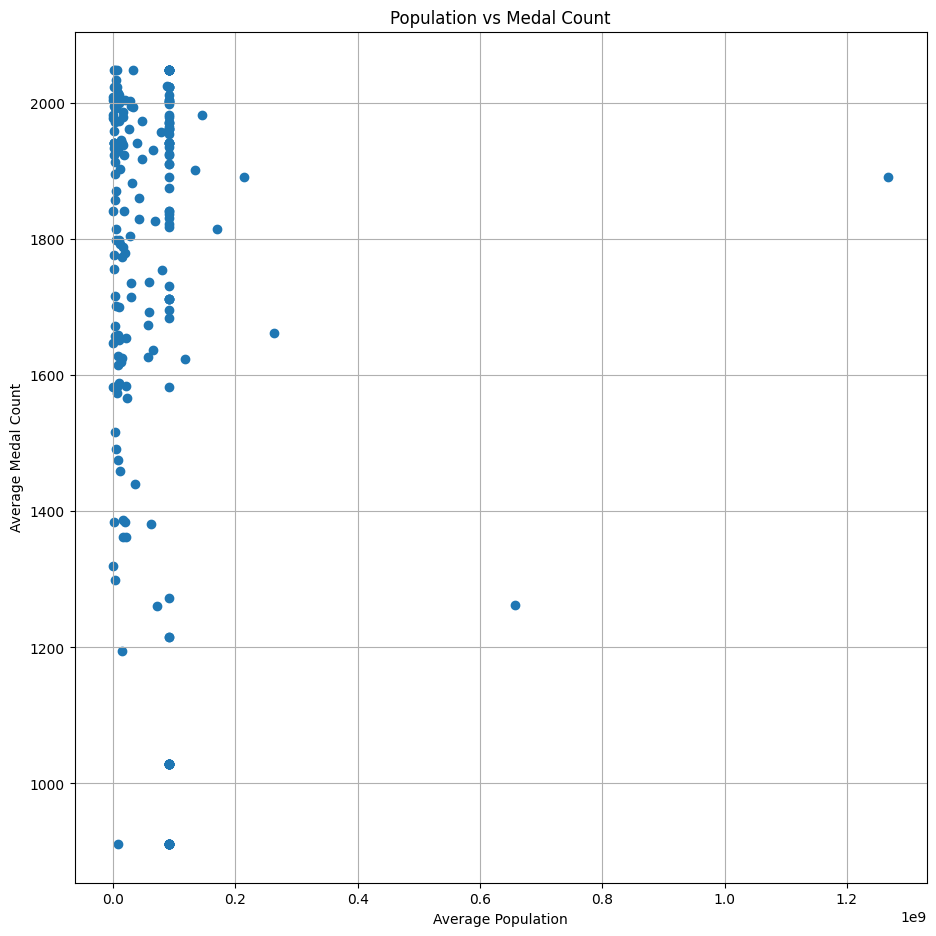

In [ ]:
#Find averages of unemployment and medals won for a country over the years and the datapoint can have the label for the country
#Group by country and find the average GDP and average Medals won (avg Medal Count) for each country
grouped_data_w_avg = merged_data_w_medal_count.groupby('Team').agg({'Population': 'mean', 'Medal_Count': 'mean'}).reset_index()

#Create the scatter plot with GDP as the X axis and Medals won as the Y axis
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(grouped_data_w_avg['Population'], grouped_data_w_avg['Medal_Count'])

ax.set_xlabel('Average Population')
ax.set_ylabel('Average Medal Count')
ax.set_title('Population vs Medal Count')

plt.tight_layout(pad=3.0)
plt.grid(True)
plt.show()

Simiilar to the previous two cases, this data does not have a clear trend as to whether population affects Olympic performance. However, we can note that most of the countries do seem to have a low population and they do great performance wise! Plus, a few of the datapoints do denote that extremely high population leads to slight decrease in performance (as seen by a low number of medals won)

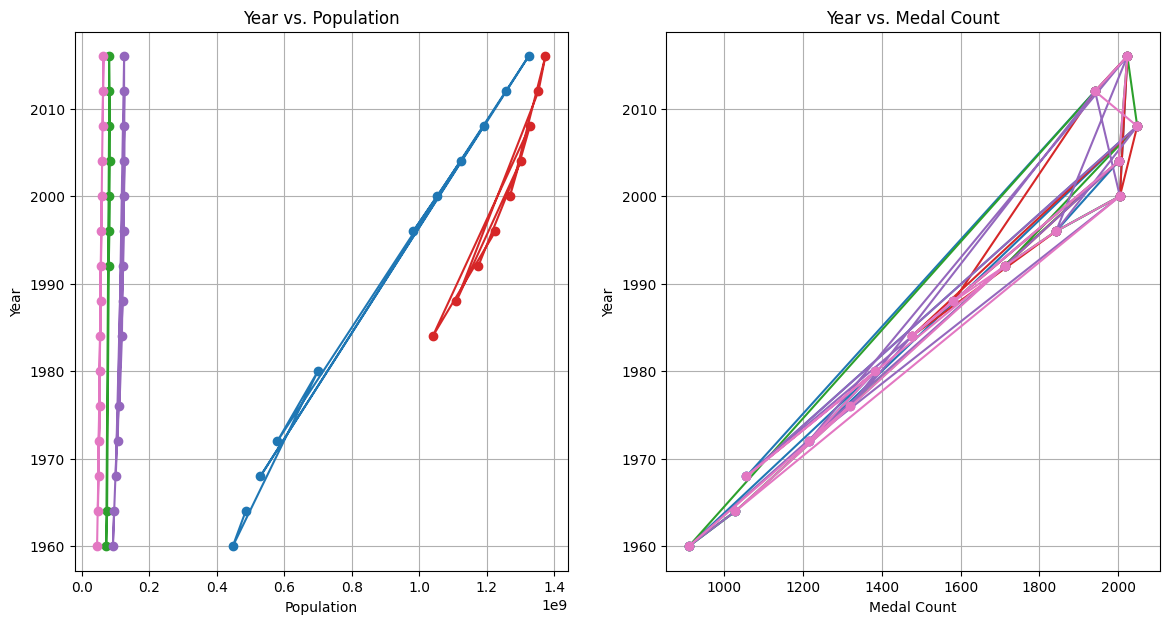

In [ ]:
#plot Years vs GDP and Years vs Medals one  - do this for certain countries
country_list = ['India', 'USA', 'Germany', 'China', 'Japan', 'UK', 'France']

#filter the merged data to only include the countries we want to plot
filtered_data = merged_data_w_medal_count[merged_data_w_medal_count['Team'].isin(country_list)]
filtered_data = filtered_data.drop_duplicates(subset=['Team', 'Year'])

#creating two graphs next to each other for ease of comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

#GDP vs Year for each country
for team in country_list:
    team_data = filtered_data[filtered_data['Team'] == team]
    ax1.plot(team_data['Population'], team_data['Year'], label=team, marker='o')


ax1.set_xlabel('Population')
ax1.set_ylabel('Year')
ax1.set_title('Year vs. Population')
ax1.grid(True)

#Medal Count vs Year for each country
for team in country_list:
    team_data = filtered_data[filtered_data['Team'] == team]
    ax2.plot(team_data['Medal_Count'], team_data['Year'], label=team, marker='o')



ax2.set_xlabel('Medal Count')
ax2.set_ylabel('Year')
ax2.set_title('Year vs. Medal Count')
ax2.grid(True)


plt.show()

An interesting observation to make here is that if the population of a country remains constant or increases, the performance of the teams increases as well when ideally, higher population means lower socioeconomic performance and therefore, according to the previously mentioned research paper, lower Olympics performance.

Our Statement - Constant or Increase in population seems to lead to an increase in Olympics performance. Maybe an increase in population led to more members of the community pursuing sports and therefore better performance.

*However, one thing that we should note in all fo these analysis is that the data points are taken over the years. Most countries do tend to evolve as the years go by which is clearly seen from most of these graphs as most countries tend to improve their performance over the years.*

In [ ]:
#which country is best in which sports based on the total number of medals won
country_list = ['India', 'USA', 'Germany', 'China', 'Japan', 'UK', 'France']

#filter the merged data to only include the countries we want to plot
filtered_data = merged_data_w_medal_count[merged_data_w_medal_count['Team'].isin(country_list)]
filtered_data = filtered_data.drop_duplicates(subset=['Team', 'Year'])

#creating two graphs next to each other for ease of comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

#GDP vs Year for each country
for team in country_list:
    team_data = filtered_data[filtered_data['Team'] == team]
    ax1.plot(team_data['Population'], team_data['Year'], label=team, marker='o')


ax1.set_xlabel('Population')
ax1.set_ylabel('Year')
ax1.set_title('Year vs. Population')
ax1.grid(True)

#Medal Count vs Year for each country
for team in country_list:
    team_data = filtered_data[filtered_data['Team'] == team]
    ax2.plot(team_data['Medal_Count'], team_data['Year'], label=team, marker='o')



ax2.set_xlabel('Medal Count')
ax2.set_ylabel('Year')
ax2.set_title('Year vs. Medal Count')
ax2.grid(True)


plt.show()